In [1]:
%matplotlib notebook
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle#洗牌函数，打乱数据

In [2]:
df = pd.read_csv("G:/dldata/boston.csv",header=0)

#print(df.describe()) 输出数据简介    # print(df)  输出所有数据

In [3]:
df = df.values
df = np.array(df)

In [4]:
for i in range(12):
    df[:,i]=(df[:,i]-df[:,i].min())/(df[:,i].max()-df[:,i].min())

In [5]:
x_data = df[:,:12]   #前12列作为特征数据
y_data = df[:,12]    #第13列作为标签数据

In [6]:
x = tf.placeholder(tf.float32, [None,12], name = "X")
y = tf.placeholder(tf.float32, [None,1] ,name ="Y")

In [7]:
#定义模型函数
with tf.name_scope("Model"):   #定义了一个命名空间
    w = tf.Variable(tf.random_normal([12,1],stddev=0.01), name="W")#初始化值为shape=(12,1)的随机数
    
    b = tf.Variable(1.0, name="B")
    
    def model(x,w,b):
        return tf.matmul(x,w)+b
    pred = model(x,w,b)

In [8]:
train_epochs = 50#迭代次数
learning_rate = 0.01#学习率

with tf.name_scope("Lossfunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2))  #均方误差

In [9]:
#创建优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [10]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

In [11]:
#为TensorBoard可视化准备数据

logdir = 'G:/dldata/log'  #设置日志存储路径

sum_loss_op = tf.summary.scalar("loss",loss_function) #创建一个操作，用于记录损失值loss,后面再TensorBoard中SCALARS栏可见

merged = tf.summary.merge_all()  #把所有需要记录摘要日志文件合并，方便一次性写入

In [12]:
#创建摘要文件写入器(FileWriter)

writer = tf.summary.FileWriter(logdir,sess.graph) #创建摘要writer，将计算图写入摘要文件，后面再TensorBoard中GRAPHS中可见

In [13]:
loss_list =[]  #保存loss值的列表
for epoch in range (train_epochs):
    loss_sum = 0.0
    for xs,ys in zip(x_data,y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        _,summary_str, loss = sess.run([optimizer,sum_loss_op,loss_function], feed_dict={x:xs, y:ys})
        
        writer.add_summary(summary_str,epoch)
        
        loss_sum = loss_sum + loss

     #打乱数据，暂时不知道怎么用  xvalues,yvalues = shuffle(x_data,y_data)
    
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    
    loss_list.append(loss_average)   #每轮添加一次
    
    print("epoch=", epoch, "loss=", loss_average, "b=", b0temp, "w", w0temp)

epoch= 0 loss= 28.0471532036 b= 3.94667 w [[ 0.44649446]
 [-0.99063075]
 [ 2.12658095]
 [-0.23509313]
 [ 1.61807466]
 [-1.88553977]
 [ 4.60308361]
 [ 0.36755213]
 [ 0.78035289]
 [ 1.52404881]
 [ 2.73915148]
 [ 1.44444275]]
epoch= 1 loss= 22.5977918209 b= 4.13483 w [[ 0.50700945]
 [-1.1444397 ]
 [ 2.77841353]
 [-0.61634648]
 [ 1.84745967]
 [-4.52320957]
 [ 5.88551331]
 [ 0.30432484]
 [ 0.75295508]
 [ 2.02607059]
 [ 3.11302185]
 [ 0.57112515]]
epoch= 2 loss= 20.97656827 b= 4.54499 w [[ 0.49555948]
 [-0.95517433]
 [ 3.11144185]
 [-0.90431696]
 [ 1.88052106]
 [-6.62557602]
 [ 6.71114111]
 [ 0.50332487]
 [ 0.58153743]
 [ 2.3241086 ]
 [ 3.28182173]
 [ 0.09741474]]
epoch= 3 loss= 19.964975055 b= 5.04193 w [[ 0.47794905]
 [-0.67590576]
 [ 3.29029799]
 [-1.06900489]
 [ 1.84895146]
 [-8.37838554]
 [ 7.3020072 ]
 [ 0.76894581]
 [ 0.37133315]
 [ 2.51230288]
 [ 3.33341932]
 [-0.19227526]]
epoch= 4 loss= 19.2347544862 b= 5.5701 w [[ 0.47483999]
 [-0.39882627]
 [ 3.38399792]
 [-1.13725781]
 [ 1.79814

<IPython.core.display.Javascript object>


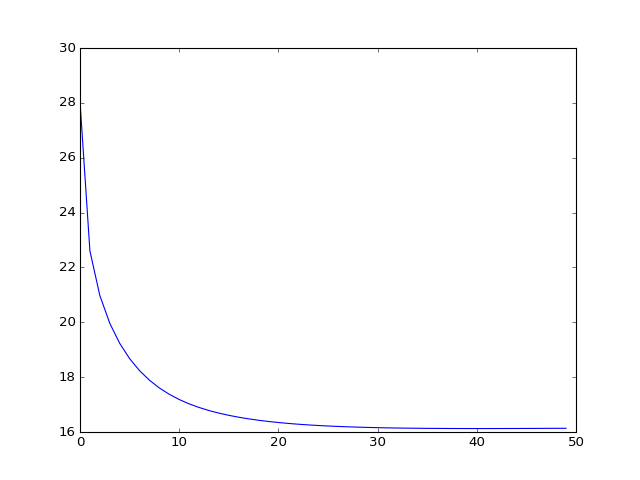

In [14]:
plt.plot(loss_list)

In [15]:
n=np.random.randint(506)
print(n)
x_test = x_data[n]

x_test = x_test.reshape(1,12)
predict = sess.run(pred,feed_dict={x:x_test})
print("预测值：%f"%predict)

target = y_data[n]
print("标签值：%f"%target)

136
预测值：15.496838
标签值：16.900000


In [16]:
sess.close()